# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects. 

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

\* *the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.*

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the alias `pd`.

In [1]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [2]:
print(pd.__version__)

2.2.2


**3.** Print out all the *version* information of the libraries that are required by the pandas library.

In [3]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.12.7.final.0
python-bits           : 64
OS                    : Windows
OS-release            : 11
Version               : 10.0.26100
machine               : AMD64
processor             : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : English_United States.1252

pandas                : 2.2.2
numpy                 : 1.26.4
pytz                  : 2024.1
dateutil              : 2.9.0.post0
setuptools            : 75.1.0
pip                   : 24.2
Cython                : None
pytest                : 7.4.4
hypothesis            : None
sphinx                : 7.3.7
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.2.1
html5lib              : None
pymysql               : None
psycopg

## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [4]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**5.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [5]:
print(df.describe())

# print(df.info())

            age     visits
count  8.000000  10.000000
mean   3.437500   1.900000
std    2.007797   0.875595
min    0.500000   1.000000
25%    2.375000   1.000000
50%    3.000000   2.000000
75%    4.625000   2.750000
max    7.000000   3.000000


**6.** Return the first 3 rows of the DataFrame `df`.

In [6]:
df.iloc[:3]
# or
# df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [7]:
df.loc[:, ['animal', 'age']] #it specifices the row labels to select in this case animal and age and then the next colon : indicates that all columns should be selected for these rows

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [8]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']] #the df.index function retrieves the index of the DataFrame and selects the 3rd, 4th and 8th position of the index

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [9]:
df[df['visits'] > 3]

,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. it is `NaN`.

In [10]:
df[df['age'].isnull()] #isnull and isna can be used alternatively

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [11]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [12]:
df[(df['age'] >= 2) & (df['age'] <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [13]:
df.loc['f', 'age'] = 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**14.** Calculate the sum of all visits in `df` (i.e. find the total number of visits).

In [14]:
df['visits'].sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [15]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [16]:
df.loc['k'] = ['dog', 2.5, 4, 'no']

df = df.drop('k', axis = 0)

**17.** Count the number of each type of animal in `df`.

In [17]:
df['animal'].value_counts()

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [18]:
df.sort_values(by = ['age', 'visits'], ascending = [False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [19]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [20]:
df['animal'] = df['animal'].replace({'snake': 'python'})

df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (*hint: use a pivot table*).

In [21]:
pd.pivot_table(df, index = ['animal'], columns = ['visits'], aggfunc = 'mean')

age            priority          
visits    1    2     3        1    2    3
animal                                   
cat     2.5  NaN  2.25      1.0  NaN  0.5
dog     3.0  6.0   NaN      0.0  0.0  1.0
python  4.5  0.5   NaN      0.0  0.0  NaN

## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

```python
1, 2, 3, 4, 5, 6, 7
```

In [22]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

df_filtered = df[df['A'] != df['A'].shift()]

print(df_filtered)

   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [23]:
df = pd.DataFrame(np.random.random(size=(5, 3)))

df = df.sub(df.mean(axis = 1), axis = 0)

df

,0,1,2
0,0.046936,0.251053,-0.297989
1,0.011719,-0.216819,0.205100
2,-0.220757,0.463266,-0.242509
3,-0.204748,0.324287,-0.119540
4,-0.366479,0.373099,-0.006620


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum?  Return that column's label.

In [24]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))

column_sums = df.sum()

print(column_sums)

minimum_sum = 1000
minimalist_label = ''

for index, value in column_sums.items():
    if value < minimum_sum:
        minimum_sum = value
        minimalist_label = index

print(minimalist_label)
#alternate and shorter way of doing this is below

smallest_sum_column = column_sums.idxmin() #idxmin() basically returns the label/index of the smallest sum

print(smallest_sum_column)

a    3.894213
b    2.897708
c    3.121460
d    2.387978
e    2.125707
f    3.778551
g    2.783997
h    2.167685
i    2.252110
j    2.549701
dtype: float64
e
e


**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

```python
df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))
```

In [25]:
df = pd.DataFrame(np.random.randint(0, 2, size = (10, 3)))

print(df)

unique_rows = df.drop_duplicates()

print(unique_rows.index)

#SHORTER way to do this BELOW

num_unique_rows = df.drop_duplicates().shape[0]
print(num_unique_rows)

   0  1  2
0  0  0  0
1  0  1  0
2  0  1  1
3  0  0  1
4  1  1  0
5  0  0  1
6  0  1  0
7  0  0  0
8  0  1  1
9  0  1  1
Index([0, 1, 2, 3, 4], dtype='int64')
5


The next three puzzles are slightly harder.


**26.** In the cell below, you have a DataFrame `df` that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values. 

For each row of the DataFrame, find the *column* which contains the *third* NaN value.

You should return a Series of column labels: `e, c, d, h, d`

In [26]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

df = pd.DataFrame(data, columns=columns)

# write a solution to the question here
(df.isnull().cumsum(axis = 1) == 3).idxmax(axis = 1)

0    e
1    c
2    d
3    h
4    d
dtype: object



**27.** A DataFrame has a column of groups 'grps' and and column of integer values 'vals': 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values. You should end up with the answer as follows:
```
grps
a    409
b    156
c    345
```

In [27]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

df
# write a solution to the question here
print(df.groupby('grps')['vals'].apply(lambda x: x.nlargest(3).sum()))

#ALTERNATE BELOW

def top_3_sum(x):
    return x.nlargest(3).sum()

result = df.groupby('grps')['vals'].agg(top_3_sum)

print(result)

grps
a    409
b    156
c    345
Name: vals, dtype: int64
grps
a    409
b    156
c    345
Name: vals, dtype: int64


**28.** The DataFrame `df` constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). 

For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

The answer should be a Series as follows:

```
A
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
```

In [28]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])

df['A_bins'] = pd.cut(df['A'], bins = range(0, 110, 10))

results = df.groupby('A_bins')['B'].sum()

results

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5428\107830163.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('A_bins')['B'].sum()


A_bins
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int32

## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be 

```
[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
```

Make this a new column 'Y'.

In [29]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

df_reset = (df == 0).cumsum()

print(df_reset)

print(df_reset.shift(1, fill_value = 0))

   X
0  0
1  0
2  1
3  1
4  1
5  1
6  1
7  2
8  2
9  2
   X
0  0
1  0
2  0
3  1
4  1
5  1
6  1
7  1
8  2
9  2


**30.** Consider the DataFrame constructed below which contains rows and columns of numerical data. 

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:
```
[(5, 7), (6, 4), (2, 5)]
```

In [30]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))

df.unstack().sort_values()[-3:].index.tolist()

[(5, 7), (6, 4), (2, 5)]

**31.** You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

```python
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
```

Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

```
    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6
```

In [31]:
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15),
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
def replace(group):
    mask = group < 0
    group[mask] = group[~mask].mean()
    return group

df['patched_vals'] = df.groupby(['grps'])['vals'].transform(replace)

df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5428\3001919416.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.6' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  group[mask] = group[~mask].mean()


,vals,grps,patched_vals
0,-12,A,13.6
1,-7,B,28.0
2,-14,A,13.6
3,4,A,4.0
4,-7,A,13.6
5,28,B,28.0
6,-2,A,13.6
7,-1,A,13.6
8,8,A,8.0
9,-2,B,28.0


**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [32]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})

df.groupby('group')['value'].transform(lambda x: x.rolling(window = 3, min_periods = 1).mean())

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [33]:
business_days_2015 = pd.bdate_range(start = '1/1/2015', end = '12/31/2015')

random_numbers = np.random.randint(1, 261, size = len(business_days_2015))

s = pd.Series(random_numbers, index = business_days_2015)
s

2015-01-01    210
2015-01-02    186
2015-01-05    215
2015-01-06    215
2015-01-07    104
             ... 
2015-12-25    133
2015-12-28    214
2015-12-29    205
2015-12-30    215
2015-12-31      7
Freq: B, Length: 261, dtype: int32

**34.** Find the sum of the values in `s` for every Wednesday.

In [34]:
sum_of_weds = s[s.index.day_name() == 'Wednesday'].sum()

sum_of_weds

7215

**35.** For each calendar month in `s`, find the mean of values.

In [35]:
mean_by_monthly = s.groupby(s.index.to_period('M')).mean()

mean_by_monthly

2015-01    159.272727
2015-02    123.050000
2015-03    107.181818
2015-04    145.863636
2015-05    149.428571
2015-06    123.954545
2015-07    136.956522
2015-08    145.571429
2015-09    145.045455
2015-10    163.045455
2015-11    125.857143
2015-12    151.913043
Freq: M, dtype: float64

**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [36]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5428\1554433663.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  s.groupby(pd.Grouper(freq='4M')).idxmax()


2015-01-31   2015-01-26
2015-05-31   2015-03-12
2015-09-30   2015-06-12
2016-01-31   2015-12-02
Freq: 4ME, dtype: datetime64[ns]

**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [37]:
dates = pd.date_range(start = '2015-01-01', end = '2016-12-31', freq = 'MS') #MS means month start

third_thursday = dates + pd.DateOffset(weekday = 3, weeks = 2)

third_thursday

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5428\3314197659.py:3: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  third_thursday = dates + pd.DateOffset(weekday = 3, weeks = 2)


DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq=None)

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
Formatted, it looks like this:

```
            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"
```


(It's some flight data I made up; it's not meant to be accurate in any way.)


**38.** Some values in the the **FlightNumber** column are missing (they are `NaN`). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify `df` to fill in these missing numbers and make the column an integer column (instead of a float column).

In [38]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})

df['FlightNumber'] = df['FlightNumber'].interpolate(method = 'linear')

df['FlightNumber'] = df['FlightNumber'].astype('int')

df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


**39.** The **From\_To** column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame. 

In [39]:
temp= df['From_To'].str.split('_', expand = True)
temp.columns = ['From', 'To']

temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [40]:
temp = temp.map(lambda x: x.capitalize() if isinstance(x, str) else x)

temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


**41.** Delete the **From_To** column from `df` and attach the temporary DataFrame 'temp' from the previous questions.

In [41]:
# df.drop(['From_To'], axis = 1, inplace = True)


# final = pd.concat([df, temp], axis = 1)

#correcting the order of the columns

cols = final.columns.tolist()
new_order = cols[-2:] + cols[:-2]

final = final[new_order]
final

NameError: name 'final' is not defined

**42**. In the **Airline** column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [ ]:
final['Airline'] = final['Airline'].apply(lambda x : ''.join(char for char in x if char.isalpha() or char.isspace()))
final

**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [ ]:
max_length = final['RecentDelays'].apply(len).max()

expanded_df = final['RecentDelays'].apply(lambda x: pd.Series(x))

expanded_df.columns = [f'delay_{i+1}' for i in range(max_length)]

final_df = pd.concat([final, expanded_df], axis = 1)

final_df.drop('RecentDelays', axis = 1, inplace = True)

final_df

The DataFrame should look much better now.
```
   FlightNumber          Airline      From         To  delay_1  delay_2  delay_3
0         10045              KLM    London      Paris     23.0     47.0      NaN
1         10055       Air France    Madrid      Milan      NaN      NaN      NaN
2         10065  British Airways    London  Stockholm     24.0     43.0     87.0
3         10075       Air France  Budapest      Paris     13.0      NaN      NaN
4         10085        Swiss Air  Brussels     London     67.0     32.0      NaN
```

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [ ]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

multi_index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])

s = pd.Series(np.random.rand(len(multi_index)), index = multi_index)

s

**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [45]:
s.index.is_monotonic_increasing #it's true hence yes it is lexicographically (sorting based on levels of index primary > secondary > other levels) sorted

True

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [49]:
index = pd.IndexSlice #clarifies to pandas that we will be running .loc only in levels of indexing rather than row-columns

result = s.loc[index[:, [1, 3, 6]]]

result

Letter  Number
A       1         0.724058
        3         0.599393
        6         0.236159
B       1         0.945903
        3         0.705338
        6         0.511382
C       1         0.786296
        3         0.010370
        6         0.063673
dtype: float64

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [51]:
s.loc[index[:'B', 5:]]

Letter  Number
A       5         0.631955
        6         0.236159
        7         0.479263
        8         0.512676
        9         0.215366
B       5         0.783792
        6         0.511382
        7         0.013960
        8         0.346778
        9         0.995294
dtype: float64

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [56]:
s.groupby(level = 0).sum() #selects the first(primary) level in the series can also use level = 'letters' instead

Letter
A    4.802601
B    6.165865
C    3.507912
dtype: float64

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [60]:
s.unstack().sum(axis = 1) #unstack method basically converts the series into a dataframe containing columns and rows like a normal dataframe

Letter
A    4.802601
B    6.165865
C    3.507912
dtype: float64

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [77]:
s_swapped = s.swaplevel(0 ,1)

if not s_swapped.index.is_monotonic_increasing:
    s_swapped = s_swapped.sort_index() #take NOTE THAT NEEDS TO SORT INDEX NOT values

s.index.is_monotonic_increasing

# s_swapped.sort_values(ascending = True, inplace = True)

True

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with Minesweeper:
- https://en.wikipedia.org/wiki/Minesweeper_(video_game)


If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [104]:
df = pd.DataFrame()

x = 5
y = 4

x = np.arange(x)
y = np.arange(y)

X, Y = np.meshgrid(x, y) #creates a mesh/coordinal grid
coordinates = np.column_stack([X.flatten(), Y.flatten()])

df = pd.DataFrame(coordinates, columns = ['x', 'y'])

#ALTERNATE SOLUTION BELOW USING ONLY PANDAS

length = 5
width = 4

index = pd.MultiIndex.from_product([range(length), range(width)], names = ['x', 'y']) #the from_product method uses the cartersian product of both lists of length-width hence creating combos

alternate = pd.DataFrame(index  = index).reset_index()




**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [105]:
df['mine'] = np.random.binomial(1, 0.4, size = len(df))

print(df)

    x  y  mine
0   0  0     0
1   1  0     0
2   2  0     0
3   3  0     0
4   4  0     0
5   0  1     1
6   1  1     0
7   2  1     0
8   3  1     0
9   4  1     1
10  0  2     1
11  1  2     0
12  2  2     0
13  3  2     0
14  4  2     0
15  0  3     0
16  1  3     0
17  2  3     0
18  3  3     0
19  4  3     1


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [107]:
mine_grid = df.pivot(index = 'y', columns = 'x', values = 'mine')

# mine_grid

shift_up = mine_grid.shift(1, axis = 0, fill_value = 0) #shifting up to check for adjacent squares
shift_down = mine_grid.shift(-1, axis = 0, fill_value = 0) # " down """""""""""""""""""""""""""""
shift_right = mine_grid.shift(-1, axis = 1, fill_value = 0) # " right """""""""""""""""""""""""""""
shift_left = mine_grid.shift(1, axis = 1, fill_value = 0) # " left """""""""""""""""""""""""""""
shift_up_left = mine_grid.shift(1, axis = 0, fill_value = 0).shift(1, axis = 1, fill_value = 0) #checking diagonally adjacent up then left in this case
shift_up_right = mine_grid.shift(1, axis = 0, fill_value = 0).shift(-1, axis = 1, fill_value = 0)
shift_down_left = mine_grid.shift(-1, axis = 0, fill_value = 0).shift(1, axis = 1, fill_value = 0)
shift_down_right = mine_grid.shift(-1, axis = 0, fill_value = 0).shift(-1, axis = 1, fill_value = 0)

adjacent_mines = shift_up + shift_down + shift_right + shift_left + shift_up_left + shift_up_right + shift_down_left + shift_down_right

# df_adjacent = adjacent_mines.stack().reset_index(name = 'adjacent')

# df = df.merge(df_adjacent, on=['x', 'y'], how = 'left')

df['adjacent'] = df_adjacent['adjacent']

df

,x,y,mine,adjacent
0,0,0,0,1
1,1,0,0,2
2,2,0,0,1
3,3,0,0,1
4,4,0,0,0
5,0,1,1,0
6,1,1,0,3
7,2,1,0,2
8,3,1,0,4
9,4,1,1,2


**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [108]:
df.loc[df['mine'] == 1, 'adjacent'] = np.nan #it filters the rows where mine = 1 and then goes through the column adjacent for those rows and change values to nan

df

,x,y,mine,adjacent
0,0,0,0,1.0
1,1,0,0,2.0
2,2,0,0,1.0
3,3,0,0,1.0
4,4,0,0,0.0
5,0,1,1,NaN
6,1,1,0,3.0
7,2,1,0,2.0
8,3,1,0,4.0
9,4,1,1,NaN


**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [109]:
df.pivot(index = 'y', columns = 'x', values = 'adjacent') #unstack is used for reshaping MultiIndex dataframes into a grid

x,0,1,2,3,4
y,,,,,
0,1.0,2.0,1.0,1.0,0.0
1,NaN,3.0,2.0,4.0,NaN
2,NaN,3.0,2.0,4.0,2.0
3,0.0,1.0,2.0,4.0,NaN


## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

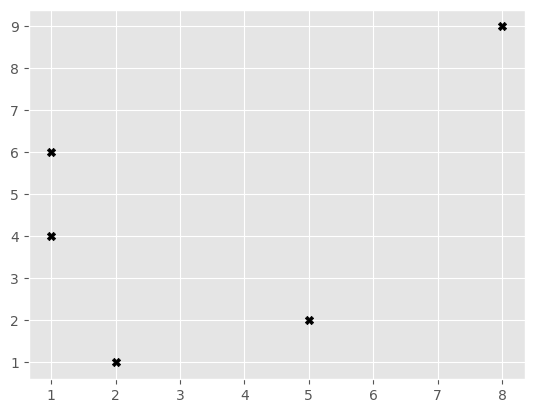

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

plt.scatter(x = df['xs'], y = df['ys'], color = 'black', marker = 'X')
plt.show()

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5428\1718479386.py:19: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='none', label='Caffeinated (larger dots)', edgecolor='black'),


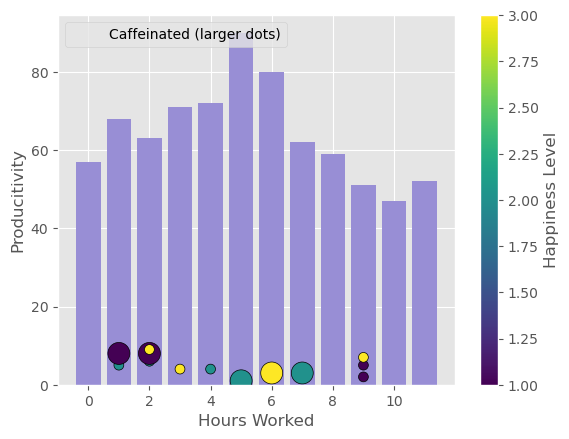

In [127]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

scatter = plt.scatter(df['hours_in'], df['productivity'], c = df['happiness'], cmap = 'viridis', s = df['caffienated'] * 200 + 50, marker = 'o', edgecolors = 'black')
#color shows happiness and size of marker indicates caffeine

cbar = plt.colorbar(scatter)
cbar.set_label('Happiness Level')

plt.xlabel('Hours Worked')
plt.ylabel('Producitivity')


#creates legend (key) for caffeine
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='none', label='Caffeinated (larger dots)', edgecolor='black'),
]
plt.legend(handles=legend_handles, loc='upper left')

plt.show()

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

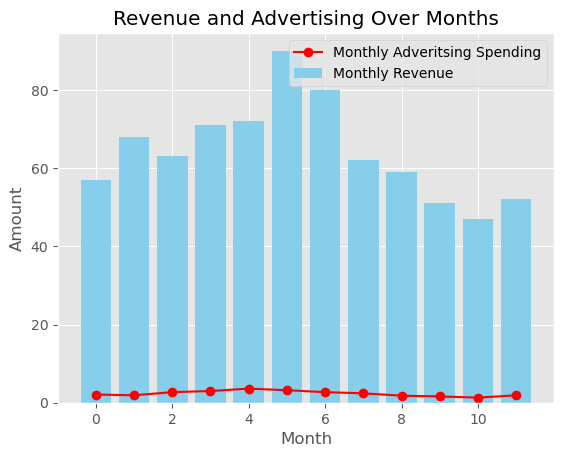

In [137]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

plt.bar(df['month'], df['revenue'], color = 'skyblue', label = 'Monthly Revenue')
plt.plot(df['month'], df['advertising'], color = 'red', marker = 'o', label = 'Monthly Adveritsing Spending') #label in this method is used for legend i.e. key
 
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Revenue and Advertising Over Months')
plt.legend()

plt.show()

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [138]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5428\990691206.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.time = pd.to_datetime(df.time)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5428\590366717.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_summary = random_stocks.resample('H').agg({'price': ['first', 'max', 'min', 'last']})  # Resample hourly


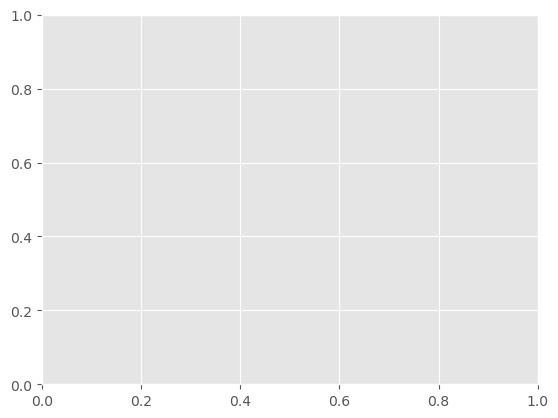

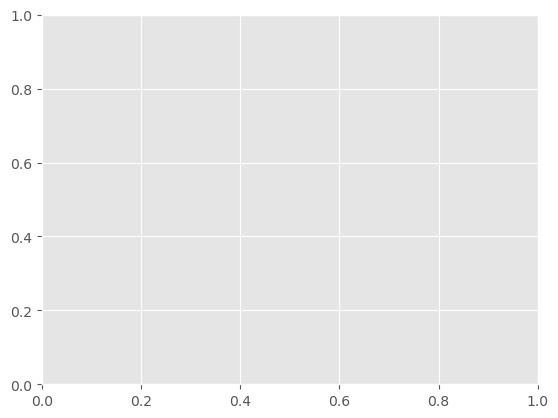

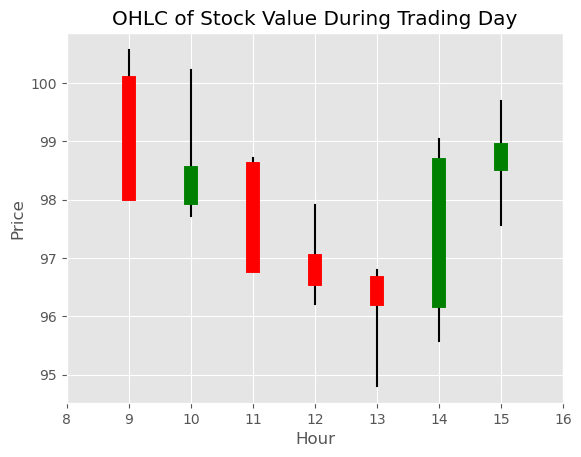

In [145]:
random_stocks = day_stock_data()

random_stocks.set_index('time', inplace=True)
hourly_summary = random_stocks.resample('H').agg({'price': ['first', 'max', 'min', 'last']})  # Resample hourly

hourly_summary.columns = ['open', 'high', 'low', 'close']  # Rename columns
hourly_summary['color'] = np.where(hourly_summary['close'] > hourly_summary['open'], 'green', 'red')

# Keep the DatetimeIndex, no need to reset the index
# Pass the DataFrame with DatetimeIndex to the plot_candlestick function

plot_candlestick(hourly_summary)  # Now this should work without error


**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

In [143]:
plot_candlestick(hourly_summary)

AttributeError: 'int' object has no attribute 'hour'

*More exercises to follow soon...*